# Linear Regression V2

### Import necessary library and packages

In [1]:
# import
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setting X and y values and spliting the data
# known parameters
weight = 0.7
bias = 0.3

# variables
start = 0
end = 1
step = 0.02

# X and y
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] 

### Create Class
Using nn.Linear
<br/>
link for different kind of layers: https://pytorch.org/docs/stable/nn.html

In [3]:
class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.Linear for creating the model
        self.linear_layer = nn.Linear(in_features= 1,
                                      out_features= 1)
        
    def forward(self, x: torch.Tensor):
            return self.linear_layer(x)
        
# Create an instance of the class
# set the manual seed first
torch.manual_seed(42)
model_lr_v2 = LinearRegressionV2()

# view model details
print(model_lr_v2)
model_lr_v2.state_dict()

LinearRegressionV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### Training
For training we need:
- Loss Fucntion
- Optimizer
- Training loop
- Testing loop

In [4]:
# setup loss function
loss_fn = nn.L1Loss() # MAE
# setup optimizer
optimizer = torch.optim.SGD(params=model_lr_v2.parameters(),
                            lr = 0.001)

In [5]:
# training loop
torch.manual_seed(42)
epochs = 1500 

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    ###TRAINING MODE### 
    model_lr_v2.train()
    
    # forward pass
    y_pred = model_lr_v2(X_train)
    
    # calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # optimizer zero grad
    optimizer.zero_grad()
    
    # back propagation
    loss.backward()
    
    # optimizer
    optimizer.step()
    
    ###TESTING MODE### 
    model_lr_v2.eval()
    with torch.inference_mode():
        test_pred = model_lr_v2(X_test)
        
        test_loss = loss_fn(test_pred, y_test)
        
    # print out what's happening every 10 epoch's
    if epoch % 100 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test loss: {test_loss}')  

Epoch: 0 | MAE Train Loss: 0.5551779866218567 | MAE Test loss: 0.5861000418663025
Epoch: 100 | MAE Train Loss: 0.4399694502353668 | MAE Test loss: 0.4513920247554779
Epoch: 200 | MAE Train Loss: 0.3247610628604889 | MAE Test loss: 0.31668391823768616
Epoch: 300 | MAE Train Loss: 0.2095526158809662 | MAE Test loss: 0.1819758117198944
Epoch: 400 | MAE Train Loss: 0.0943441390991211 | MAE Test loss: 0.04726767539978027
Epoch: 500 | MAE Train Loss: 0.02415679767727852 | MAE Test loss: 0.044561706483364105
Epoch: 600 | MAE Train Loss: 0.019893139600753784 | MAE Test loss: 0.046012092381715775
Epoch: 700 | MAE Train Loss: 0.016448121517896652 | MAE Test loss: 0.03835631161928177
Epoch: 800 | MAE Train Loss: 0.013013547286391258 | MAE Test loss: 0.030322950333356857
Epoch: 900 | MAE Train Loss: 0.009578981436789036 | MAE Test loss: 0.022289592772722244
Epoch: 1000 | MAE Train Loss: 0.006145041435956955 | MAE Test loss: 0.014290553517639637
Epoch: 1100 | MAE Train Loss: 0.002710457891225815 | 

In [6]:
# check the new parameters
model_lr_v2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6999]])),
             ('linear_layer.bias', tensor([0.3008]))])

### Visualize

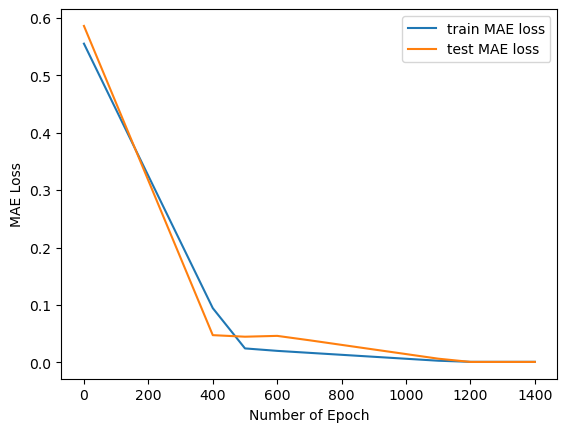

In [7]:
# plot the loss
# epoch count on x axis and both the train and test MAE loss on the y axis

xtrain_loss = np.array(torch.tensor(train_loss_values))
xtest_loss = np.array(torch.tensor(test_loss_values))

plt.plot(epoch_count, xtrain_loss , label = 'train MAE loss')
plt.plot(epoch_count, xtest_loss, label = 'test MAE loss')

plt.xlabel('Number of Epoch')
plt.ylabel('MAE Loss')
plt.legend()

In [24]:
def plot_predictions(train_data = X_train,
                    train_labels=y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):
    
    plt.figure(figsize=(7,5))
    
    #plot training data
    plt.scatter(train_data, train_labels, c='b', label= "training data")
    #plot test data
    plt.scatter(test_data, test_labels, c='r', 
                alpha = 0.2,
                label= "testing data")
    
    #plot the prediction if any
    if predictions is not None:
        plt.scatter(test_data, predictions, c='green',
                    alpha = 0.5,
                    label= 'predictions')
        
    plt.legend(prop={'size':10})

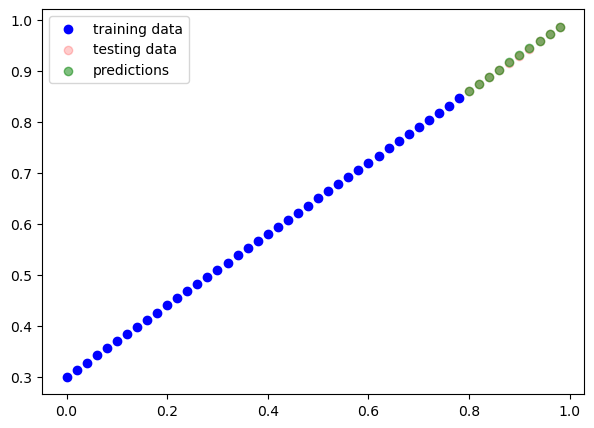

In [25]:
with torch.inference_mode():
    y_preds_new = model_lr_v2(X_test)
plot_predictions(predictions=y_preds_new)